In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot as plt

#sklearn models for Titanic problem
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv(r"C:\Users\Ankit Negi\Desktop\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Label Encoding for male and female
le = LabelEncoder()
df.Sex = le.fit_transform(df.Sex)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#saperating out the target dataset
target = df.Survived
inputs = df.drop('Survived', axis = 1)

In [5]:
inputs.columns[inputs.isna().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [6]:
# Data cleaning 
inputs.Age.fillna(inputs.Age.mean(), inplace=True)
inputs.drop(['Name', 'Cabin', 'Ticket', 'Embarked'], axis=True, inplace=True)
inputs.Fare = inputs.Fare.round(2)
inputs.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.0,1,0,7.25
1,2,1,0,38.0,1,0,71.28
2,3,3,0,26.0,0,0,7.92
3,4,1,0,35.0,1,0,53.10
4,5,3,1,35.0,0,0,8.05


# Data Visualization

In [7]:
def SexSurvival(i):
    g = 'Male' if i == 1 else 'Female'
    gender = pd.DataFrame(df.loc[(df['Sex'] == i)])
    g_count = gender.Survived.count()
    g_surv_count = gender.loc[gender['Survived'] == 1]['Survived'].count()
    gender_survival_rate = ((g_surv_count / g_count) * 100).round(2)

    print('Survival Rate of {} was {}%'.format(g, gender_survival_rate))
    print('Total {}: {}'.format(g, g_count))
    print('Total {} Survived: {}'.format(g, g_surv_count))

    plt.pie([g_count, g_surv_count], labels=['', 'Survived'])
    plt.show()
    return g_surv_count

Survival Rate of Female was 74.2%
Total Female: 314
Total Female Survived: 233


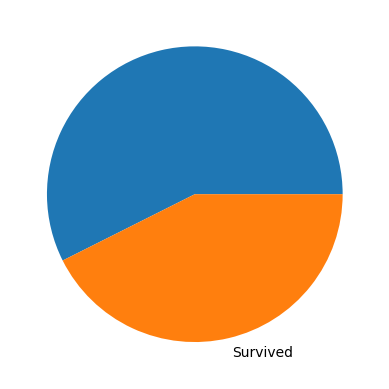

Survival Rate of Male was 18.89%
Total Male: 577
Total Male Survived: 109


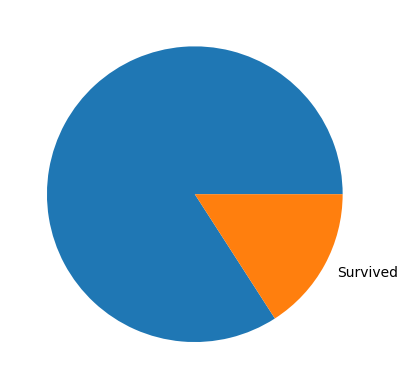

In [8]:
f_surv_count = SexSurvival(0)
m_surv_count = SexSurvival(1)

#Cleary more women survived than men

Total People Survived 342


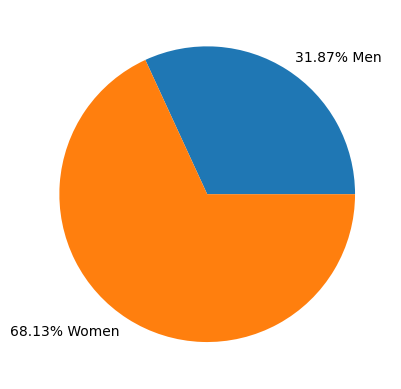

In [9]:
total = [m_surv_count, f_surv_count]
men_surv = ((m_surv_count / np.sum(total)) * 100).round(2)
women_surv = (( f_surv_count / np.sum(total)) * 100).round(2)
print('Total People Survived', np.sum(total))
plt.pie([men_surv, women_surv], labels=['{}% Men'.format(men_surv), '{}% Women'.format(women_surv)])
plt.show()

Similary Rich were given more priority at the time of rescue

# Creating and Training Models

In [10]:
folds = StratifiedKFold(n_splits=5)

In [11]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [12]:
scores_logistic = []
scores_svm = []
scores_rf = []
scores_gs = []

In [13]:
for train_index, test_index in folds.split(inputs, target):
    X_train, X_test, y_train, y_test = inputs.iloc[train_index], inputs.iloc[test_index], target.iloc[train_index], target.iloc[test_index]
    
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))
    scores_gs.append(get_score(GaussianNB(), X_train, X_test, y_train, y_test))    

In [14]:
# Mean of all these four Models
print(np.mean(scores_logistic))
print(np.mean(scores_svm))
print(np.mean(scores_rf))
print(np.mean(scores_gs))

0.7923608059757705
0.615039859393635
0.8048396208649802
0.7890151277383718


Concluding Above result, changing the number of folds resulting in diffrent score, But, Random Forest Classifier is best performig of them all.